In [4]:
import folium
import geemap

# Add Earth Engine drawing method to folium.
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

In [16]:
import ee
import folium

# Initialize the Earth Engine API
ee.Initialize()

# Define the geometry for India
india_geometry = ee.Geometry.Polygon([
    [68.1767, 7.9655], [68.1767, 35.5087], [97.4026, 35.5087], [97.4026, 7.9655], [68.1767, 7.9655]
])

# Load the Global Flood Database dataset
flood_dataset = ee.ImageCollection("GLOBAL_FLOOD_DB/MODIS_EVENTS/V1")

# Function to get flood extent for a specific month and year
def get_flood_extent(year, month):
    start_date = ee.Date.fromYMD(year, month, 1)
    end_date = start_date.advance(1, 'month')

    # Filter flood data for the specific month
    monthly_flood_collection = flood_dataset.filterDate(start_date, end_date)
    
    # Compute the flood extent for the month
    flood_extent = monthly_flood_collection.map(lambda img: img.select(0).gt(0)).sum().clip(india_geometry)

    return flood_extent

# Define the year and month for which you want to visualize the flood extent
year = 2014
month = 8

# Get the flood extent for the specified month and year
flood_extent = get_flood_extent(year, month)

# Define visualization parameters
vis_params = {
    'min': 0,
    'max': 1,
    'palette': ['white','cyan','blue']
}

# Create a folium map centered on India
map_center = [20.5937, 78.9629]  # Latitude and Longitude of India
m = folium.Map(location=map_center, zoom_start=5)

# Add the flood extent layer to the map
flood_extent_layer = folium.Map(
    location=map_center,
    zoom_start=5,
    tiles='OpenStreetMap',
    attr='Map data &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors'
)

# Add the flood extent layer to the map
flood_extent_layer.add_ee_layer(flood_extent, vis_params, 'Flood Extent')

# Add a layer control panel to the map
flood_extent_layer.add_child(folium.LayerControl())

# Display the map
flood_extent_layer

In [17]:
import pandas as pd

# Load the temperature data from the CSV file
temperature_file_path = "/Users/prreddy/Projects/Rajasthan Data/Rajasthan_district_monthly_temperature_1981_2023.csv"
temperature_df = pd.read_csv(temperature_file_path)

# Calculate the average monthly temperature for Rajasthan by averaging the monthly district temperatures
average_monthly_temperature = temperature_df.groupby(['Year', 'Month'])['Temperature (°C)'].mean().reset_index()

# Print the average monthly temperature
print(average_monthly_temperature)

# Save the average monthly temperature to a new CSV file
average_monthly_temperature.to_csv("rajasthan_average_monthly_temperature_1981_2023.csv", index=False)

     Year  Month  Temperature (°C)
0    2000      1         23.971952
1    2000      2         24.980248
2    2000      3         31.936219
3    2000      4         40.047533
4    2000      5         39.972355
..    ...    ...               ...
247  2020      8         33.145710
248  2020      9         35.378898
249  2020     10         35.340978
250  2020     11         28.985533
251  2020     12         25.510445

[252 rows x 3 columns]


    Year  Temperature (°C)
0   2000         32.939668
1   2001         32.759002
2   2002         33.648551
3   2003         32.460338
4   2004         33.384171
5   2005         32.530394
6   2006         33.065610
7   2007         32.977576
8   2008         32.606851
9   2009         33.699794
10  2010         33.370101
11  2011         32.564614
12  2012         32.499132
13  2013         32.225135
14  2014         32.733654
15  2015         32.651855
16  2016         31.312672
17  2017         31.385482
18  2018         31.612593
19  2019         30.255615
20  2020         31.378144


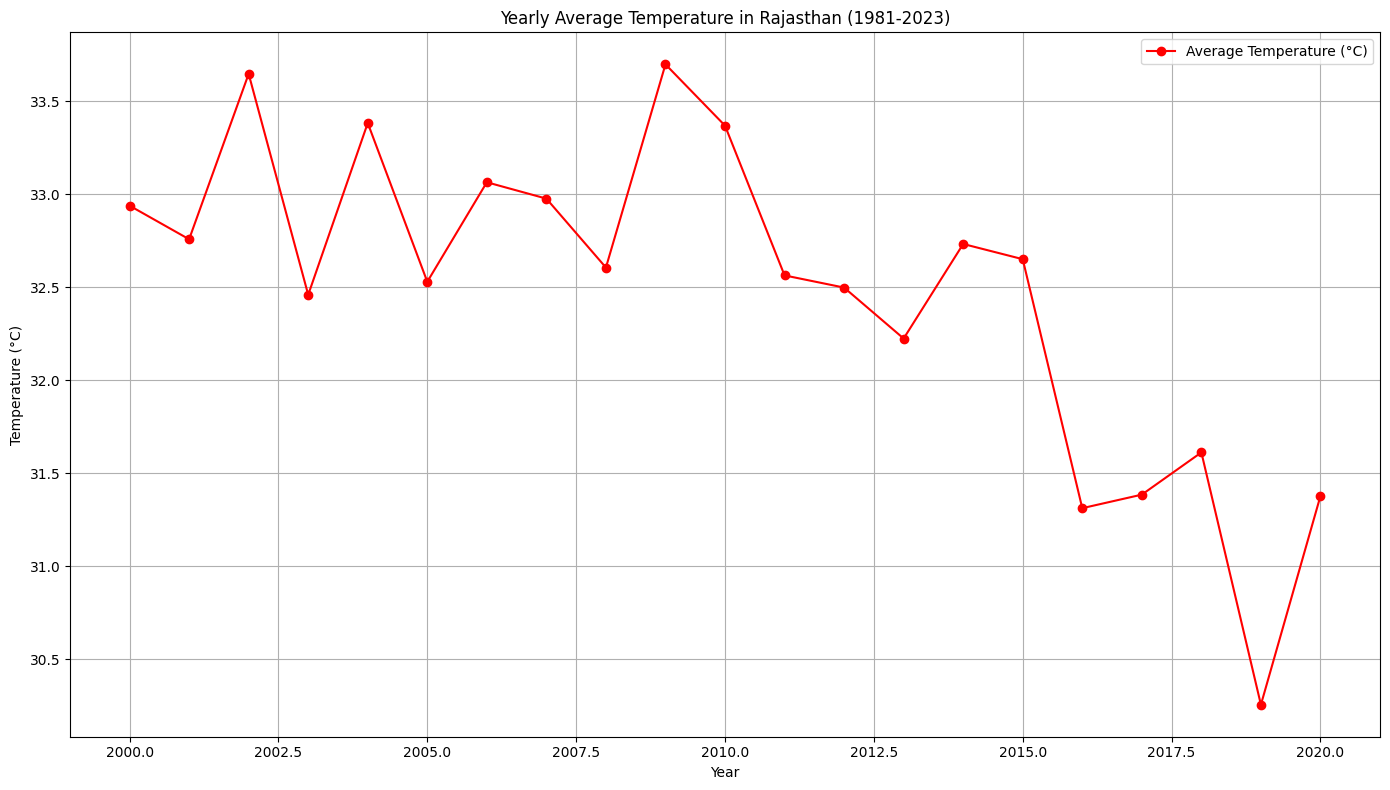

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the temperature data from the CSV file
temperature_file_path = "/Users/prreddy/Projects/Rajasthan Data/Rajasthan_district_monthly_temperature_1981_2023.csv"
temperature_df = pd.read_csv(temperature_file_path)

# Calculate the average yearly temperature for Rajasthan by averaging the monthly district temperatures
average_yearly_temperature = temperature_df.groupby(['Year'])['Temperature (°C)'].mean().reset_index()

# Print the average yearly temperature
print(average_yearly_temperature)

# Plotting the yearly average temperature
plt.figure(figsize=(14, 8))
plt.plot(average_yearly_temperature['Year'], average_yearly_temperature['Temperature (°C)'], marker='o', color='r', label='Average Temperature (°C)')

plt.title('Yearly Average Temperature in Rajasthan (1981-2023)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot to a file
plt.savefig("yearly_average_temperature_rajasthan_1981_2023.png")

# Show the plot
plt.show()

In [55]:
import pandas as pd

# Load the data from the CSV files
temperature_file_path = "/Users/prreddy/Projects/Assam Data/Assam_district_monthly_temperature_1981_2023.csv"
tree_cover_file_path = "/Users/prreddy/Projects/Assam Data/Assam_district_annual_tree_cover_2000_2020.csv"
rainfall_file_path = "/Users/prreddy/Projects/Assam Data/Assam_district_monthly_rainfall_1981_2023.csv"
flooding_file_path = "/Users/prreddy/Projects/Assam Data/Assam_district_monthly_flooding_2000_2023.csv"

temperature_df = pd.read_csv(temperature_file_path)
tree_cover_df = pd.read_csv(tree_cover_file_path)
rainfall_df = pd.read_csv(rainfall_file_path)
flooding_df = pd.read_csv(flooding_file_path)

# Calculate the average yearly temperature for Assam
average_yearly_temperature = temperature_df.groupby(['Year'])['Temperature (°C)'].mean().reset_index()

# Calculate the average yearly tree cover for Assam
average_yearly_tree_cover = tree_cover_df.groupby(['Year'])['Tree Cover (%)'].mean().reset_index()

# Calculate the total yearly precipitation for Assam
total_yearly_precipitation = rainfall_df.groupby(['Year'])['Rainfall (mm)'].sum().reset_index()

# Calculate the total yearly flood events and flood extent for Assam
total_yearly_flooding = flooding_df.groupby(['Year'])[['Flood Events', 'Flood Extent (sq km)']].sum().reset_index()

# Merge the dataframes on Year
merged_df = pd.merge(average_yearly_temperature, average_yearly_tree_cover, on='Year')
merged_df = pd.merge(merged_df, total_yearly_precipitation, on='Year')
merged_df = pd.merge(merged_df, total_yearly_flooding, on='Year')

# Print the merged dataframe
print(merged_df)

# Save the merged dataframe to a new CSV file
merged_df.to_csv("Assam_yearly_climate_data.csv", index=False)

    Year  Temperature (°C)  Tree Cover (%)  Rainfall (mm)  Flood Events  \
0   2000         27.664834       22.236648   67735.251121    1162719108   
1   2001         28.547257       22.446480   57980.079882    1162719108   
2   2002         28.125959       23.800484   58943.392034    1162719108   
3   2003         27.679059       25.095552   59540.565697    1162719108   
4   2004         27.874922       24.732627   69541.833757    1162719108   
5   2005         28.257135       26.456110   58961.403969    1162719108   
6   2006         29.031639       25.218788   52429.645616    1162719108   
7   2007         28.700364       26.371904   65076.359310    1162719108   
8   2008         28.648372       24.680676   56762.089115    1162719108   
9   2009         29.541228       26.737540   54506.660140    1162719108   
10  2010         28.889129       24.686982   71628.310852    1162719108   
11  2011         29.207719       25.441501   54503.089280    1162719108   
12  2012         28.82692

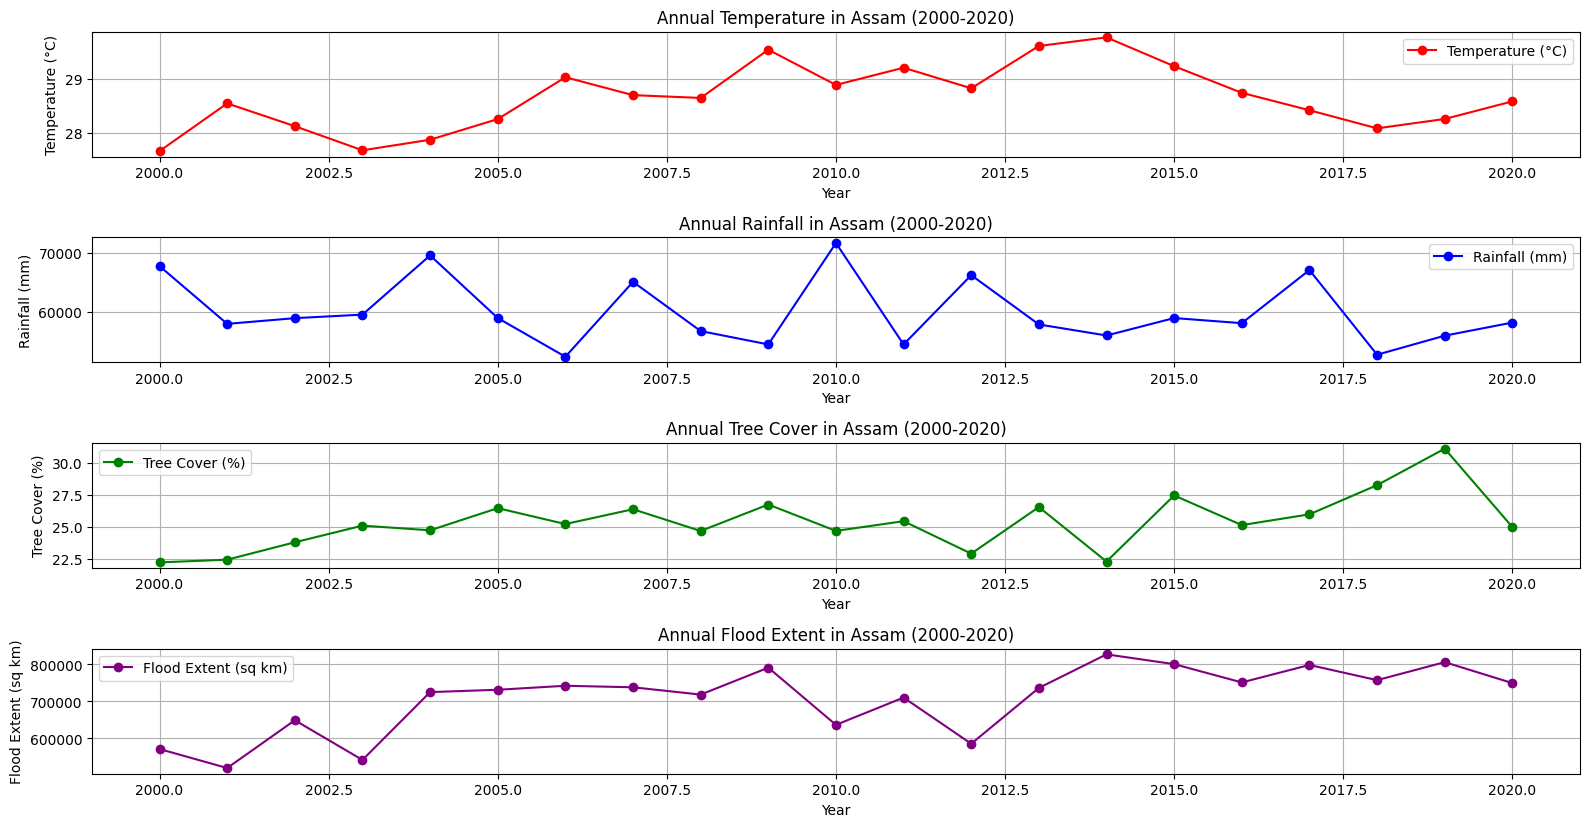

Plot saved for Assam


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the yearly climate data from the CSV file
climate_data_file_path = "/Users/prreddy/Projects/Assam Data/Assam_yearly_climate_data.csv"
climate_df = pd.read_csv(climate_data_file_path)

# Create the output directory if it doesn't exist
output_dir = "Assam_yearly_climate_plots"
os.makedirs(output_dir, exist_ok=True)

# Plotting
plt.figure(figsize=(16, 10))

# Plot temperature
plt.subplot(5, 1, 1)
plt.plot(climate_df['Year'], climate_df['Temperature (°C)'], marker='o', color='r', label='Temperature (°C)')
plt.title('Annual Temperature in Assam (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()

# Plot rainfall
plt.subplot(5, 1, 2)
plt.plot(climate_df['Year'], climate_df['Rainfall (mm)'], marker='o', color='b', label='Rainfall (mm)')
plt.title('Annual Rainfall in Assam (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.legend()

# Plot tree cover
plt.subplot(5, 1, 3)
plt.plot(climate_df['Year'], climate_df['Tree Cover (%)'], marker='o', color='g', label='Tree Cover (%)')
plt.title('Annual Tree Cover in Assam (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Tree Cover (%)')
plt.grid(True)
plt.legend()

# Plot flood extent
plt.subplot(5, 1, 4)
plt.plot(climate_df['Year'], climate_df['Flood Extent (sq km)'], marker='o', color='purple', label='Flood Extent (sq km)')
plt.title('Annual Flood Extent in Assam (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Flood Extent (sq km)')
plt.grid(True)
plt.legend()

plt.tight_layout()

# Save the plot to the output directory
plt.savefig(os.path.join(output_dir, 'Assam_yearly_climate_trends.png'))
plt.show()
plt.close()  # Close the figure to free up memory

print("Plot saved for Assam")

# Show the plot
plt.show()

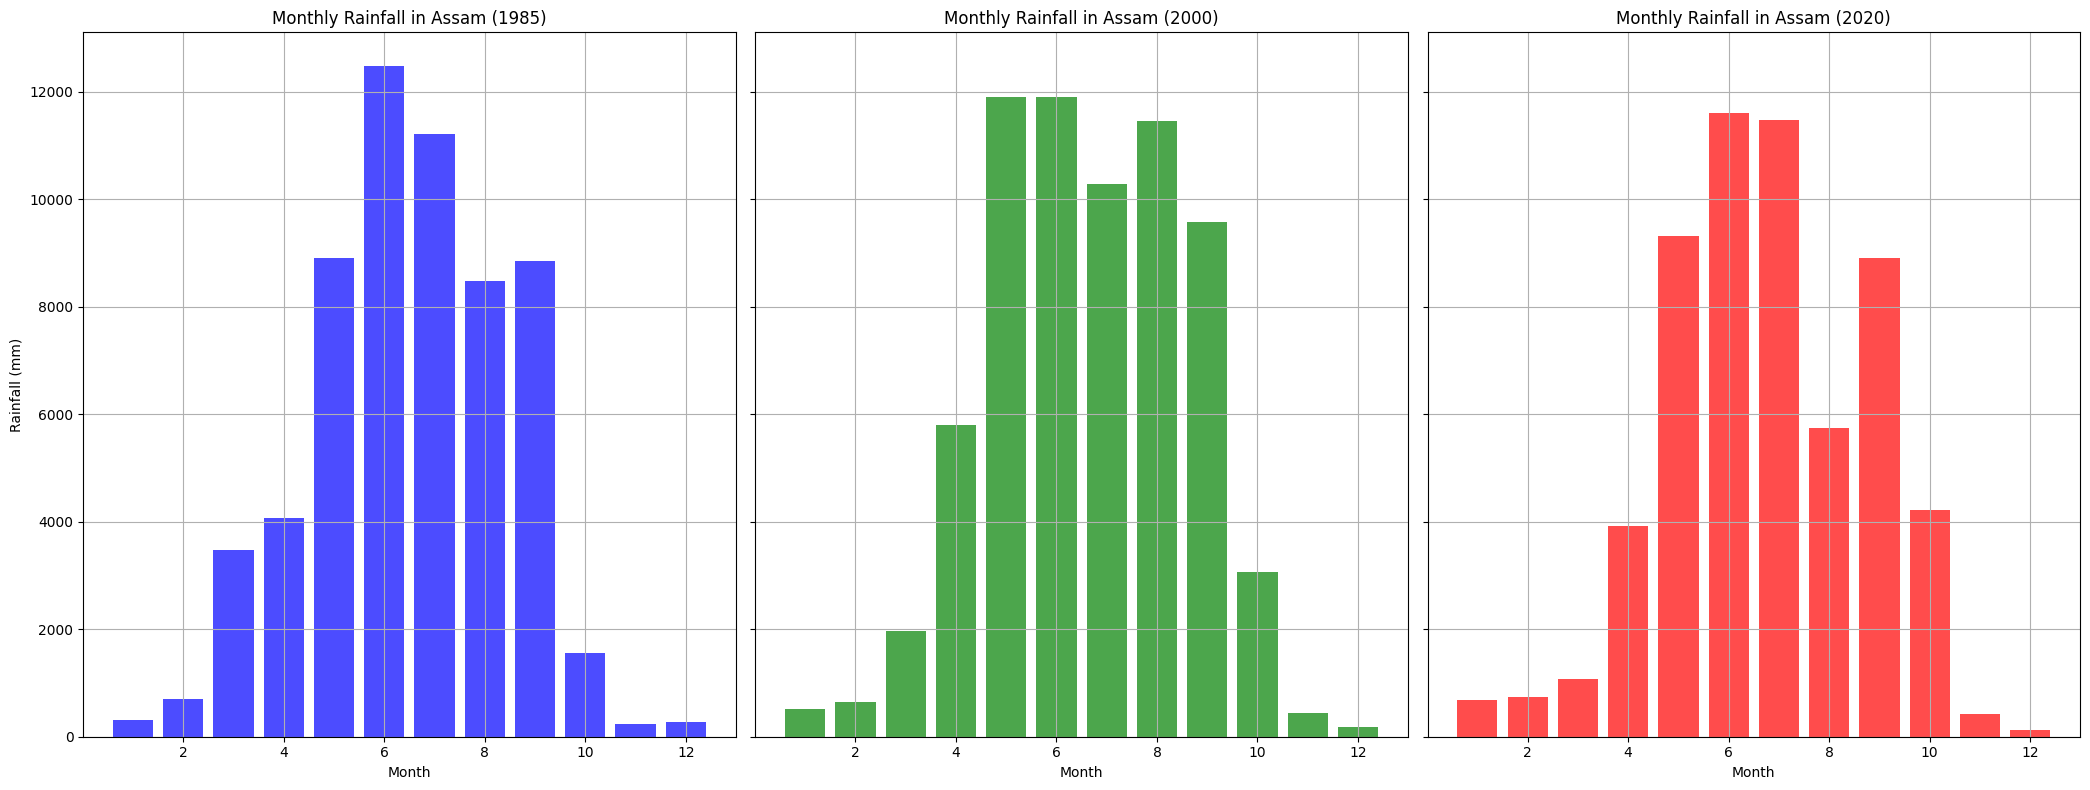

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the rainfall data from the CSV file
rainfall_file_path = "/Users/prreddy/Projects/Assam Data/Assam_district_monthly_rainfall_1981_2023.csv"
rainfall_df = pd.read_csv(rainfall_file_path)

# Filter data for the years 1985, 2000, and 2020
rainfall_1985 = rainfall_df[rainfall_df['Year'] == 1985]
rainfall_2000 = rainfall_df[rainfall_df['Year'] == 2000]
rainfall_2020 = rainfall_df[rainfall_df['Year'] == 2020]

# Group by Month and calculate the total rainfall for each month
monthly_rainfall_1985 = rainfall_1985.groupby('Month')['Rainfall (mm)'].sum().reset_index()
monthly_rainfall_2000 = rainfall_2000.groupby('Month')['Rainfall (mm)'].sum().reset_index()
monthly_rainfall_2020 = rainfall_2020.groupby('Month')['Rainfall (mm)'].sum().reset_index()

# Plotting the monthly rainfall histograms side by side
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 8), sharey=True)

# Plot for the year 1985
axes[0].bar(monthly_rainfall_1985['Month'], monthly_rainfall_1985['Rainfall (mm)'], color='b', alpha=0.7)
axes[0].set_title('Monthly Rainfall in Assam (1985)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Rainfall (mm)')
axes[0].grid(True)

# Plot for the year 2000
axes[1].bar(monthly_rainfall_2000['Month'], monthly_rainfall_2000['Rainfall (mm)'], color='g', alpha=0.7)
axes[1].set_title('Monthly Rainfall in Assam (2000)')
axes[1].set_xlabel('Month')
axes[1].grid(True)

# Plot for the year 2020
axes[2].bar(monthly_rainfall_2020['Month'], monthly_rainfall_2020['Rainfall (mm)'], color='r', alpha=0.7)
axes[2].set_title('Monthly Rainfall in Assam (2020)')
axes[2].set_xlabel('Month')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Save the plot to a file
plt.savefig("Assam_monthly_rainfall_1985_2000_2020.png")

# Show the plot
plt.show()

In [52]:
import ee
import folium
import geemap

# Initialize Earth Engine
ee.Initialize()

# Define India's boundary
india_boundary = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017") \
    .filter(ee.Filter.eq('country_na', 'India'))

# Load NOAA CPC Temperature dataset and select the tmax band
temperature_dataset = ee.ImageCollection("NOAA/CPC/Temperature").select("tmax")

# Improved visualization parameters
temp_vis_params = {
    'min': 10,   # Adjust to India's temperature range
    'max': 50,   # Tmax values can go higher
    'palette': ['blue', 'cyan', 'yellow', 'orange', 'red'],
    'opacity': 0.8  # Enhances visibility
}

# Generate annual mean temperature images from 2000 to 2020 with high resolution
years = list(range(2000, 2021))
annual_images = []
for year in years:
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    yearly_temp = temperature_dataset.filterDate(start_date, end_date).mean().clip(india_boundary)
    
    # Apply smoothing filter to improve quality
    smoothed_temp = yearly_temp.focal_mean(radius=3, kernelType='square')

    # Set default projection and increase image resolution by reducing scale
    high_res_temp = smoothed_temp.setDefaultProjection(
        crs='EPSG:4326', scale=5000
    ).reduceResolution(
        reducer=ee.Reducer.mean(), bestEffort=True
    ).reproject(crs='EPSG:4326', scale=2500)  # Higher resolution (default ~5000m)

    annual_images.append(high_res_temp.set("system:time_start", ee.Date(start_date).millis()))

# Convert list to ImageCollection
annual_temp_collection = ee.ImageCollection(annual_images)

# Create a Folium map centered on India
map_center = [22.0, 78.0]  # Center of India
m = geemap.Map(center=map_center, zoom=4)

# Add annual temperature images as layers
for year in years:
    image = annual_temp_collection.filter(ee.Filter.calendarRange(year, year, "year")).first()
    m.addLayer(image, temp_vis_params, f"Tmax {year}")

# Add a time slider widget
m.add_time_slider(annual_temp_collection, temp_vis_params, time_interval=1, position="bottomright")

# Display the map
m


Map(center=[22.0, 78.0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(…

No such comm: 3ed87ad3d7fd494c95eb7ce2560283dc
No such comm: 9056fa6d0fc94c3685e696b7d2166446
No such comm: 948831edd19342f7bafc73f34ddd7b87
No such comm: b2d90fdacaff46de8ea224be4d23faff
No such comm: d0f941c53ca648caa5f64e9b8d4f00b3
No such comm: 260c2d98f18d4100b6e34f36cb920bfd
No such comm: 4f4de854075c446a8a4d82f8f68720f9
No such comm: 06f1da4818ff449bae5a597c931e208e
No such comm: 72779565bffb48fb8799a8314f4c286a
No such comm: c46582b555194e749d21b8447226c356
No such comm: 1774f3cb2f614d7b9447c373332b597a
No such comm: f0f61c2c5e664251801cfaad22c3eb48
No such comm: 438a856b2f68489fa60b915e962fc846
No such comm: 8fcd9d9ed4344a2c9fde15ff5e7eca44
No such comm: 8152974b09df4f8da8ee7d56363c5bb3
No such comm: 31d11df314ae4f0a930fc2a1c25f2b30
No such comm: fc8d33d8a14c4244bf7b5d74609e1201
No such comm: fcf189e6f10b4b24b8e38a1a21c1d00f
No such comm: 2422850dd2cb4133bc7b3f735d4a9f3a
No such comm: 2a154bf6aae94d8ea393033d2096e2b4
No such comm: a5d5fd9994854daaa2a85b8cca3dea10
No such comm: